In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import fsolve

In [2]:
time = np.linspace(0,8,13) #from the paper

## Parameters to find from the paper

$\hat{\mu}, K_s, K_i, P_{max}$ and $n$ 

In [3]:
#initial conditions:

X0 = 25.0 #g/L
S0 = 111.5 #g/L
P0 = 0 #g/L

initialvals = [S0, X0, P0]

#Parameters in the paper

mupaper = 0.5
Kspaper = 6.1e-3
Kipaper = 139.7
Pmaxpaper = 94.2 
npaper = 4.12

params1 = mupaper, Kspaper, Kipaper, Pmaxpaper, npaper

In [4]:
#Other values calculated in the paper through regression

alpha = 4.87 #g/g
Yps = 0.4 #g/g
Yxp = 1/alpha

In [5]:
def ode(z, t):
    S = z[0]
    X = z[1]
    P = z[2]
    
    mu, Ks, Ki, Pmax, n = params1
    
    g = (1-P/Pmax)**(n)
    muB = mu*S/(Ks + S + S**2/Ki)*g
    pi = muB * alpha
    sigma = pi/Yps
    
    dSdt = -sigma*X
    dXdt = muB*X
    dPdt = pi*X
    
    
    return ([dSdt, dXdt, dPdt])

answer = odeint(ode, initialvals, time)


S = answer[:,0]
X = answer[:,1]
P = answer[:,2]

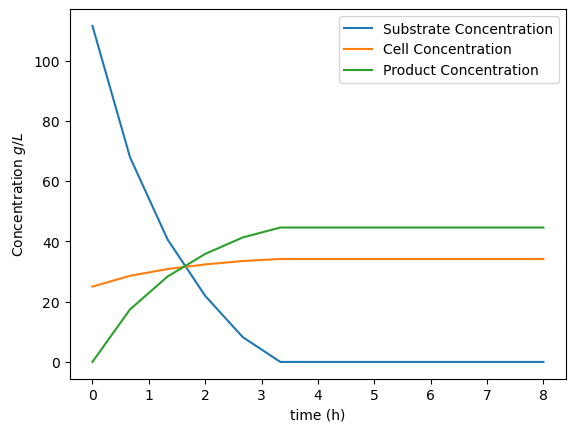

In [6]:
plt.plot(time, answer[:,0], label = 'Substrate Concentration')
plt.plot(time, answer[:,1], label = 'Cell Concentration')
plt.plot(time, answer[:,2], label = 'Product Concentration')
plt.xlabel('time (h)')
plt.ylabel('Concentration $g/L$')
plt.legend()


## All of them together with the experimental Data

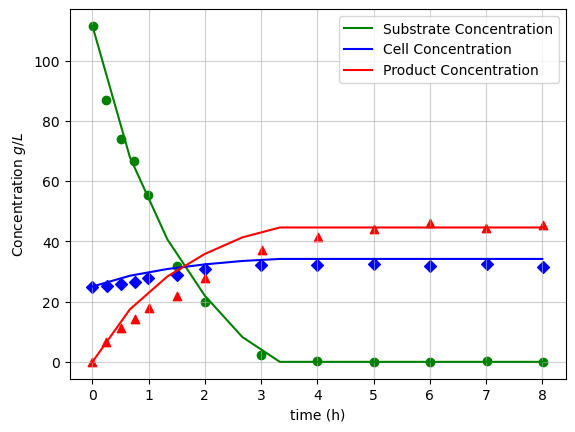

In [7]:
cellpaper = pd.read_csv('Cell.csv', header=0)
subpaper = pd.read_csv('Substrate.csv', header=0)
prodpaper = pd.read_csv('Product.csv', header=0)

papertimecell = cellpaper['Time']
paperconccell = cellpaper['Cell Concentration']

papertimesub = subpaper['Times']
paperconcsub = subpaper['Substrate Concentration']

papertimeProd = prodpaper['Time']
paperconcProd = prodpaper['Concentration']

time = np.linspace(0,8,13)

plt.scatter(papertimecell, paperconccell, color = 'b', marker = 'D')
plt.scatter(papertimesub,paperconcsub, color = 'g', marker = 'o')
plt.scatter(papertimeProd,paperconcProd, color = 'r', marker = '^')
plt.plot(time, answer[:,0], color = 'g', label = 'Substrate Concentration')
plt.plot(time, answer[:,1], color = 'b', label = 'Cell Concentration')
plt.plot(time, answer[:,2], color = 'r', label = 'Product Concentration')
plt.xlabel('time (h)')
plt.ylabel('Concentration $g/L$')
plt.grid(alpha = 0.6)
plt.legend()



# To us, the important part is the product concentration as the time goes on.

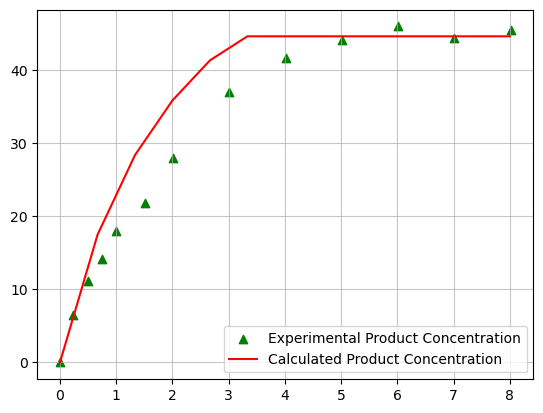

In [8]:
product = answer[:,2]
prodpaper = pd.read_csv('Product.csv', header=0)

papertime = prodpaper['Time']
paperconcProd = prodpaper['Concentration']

plt.scatter(papertime,paperconcProd, color = 'g', marker = '^', label = 'Experimental Product Concentration')
plt.plot(time,product, color = 'r', label = 'Calculated Product Concentration')
plt.grid(alpha = 0.7)
plt.legend()
plt.show()

In [9]:
cellpaper = pd.read_csv('Cell.csv', header=0)


# Optimizing the function by considering own initial position, get the parameters and calculate function.

[[111.5         25.           0.        ]
 [ 39.33259478  30.92750762  28.86696209]
 [ 31.59560793  31.56298908  31.96175683]
 [ 27.51791756  31.89791232  33.59283298]
 [ 24.813654    32.12002842  34.6745384 ]
 [ 22.81938117  32.28382906  35.47224753]
 [ 21.25470892  32.41234424  36.09811643]
 [ 19.97602427  32.51736967  36.60959029]
 [ 18.90041396  32.60571549  37.03983442]
 [ 17.97589141  32.68165163  37.40964344]
 [ 17.16782606  32.7480225   37.73286958]
 [ 16.45205174  32.806813    38.0191793 ]
 [ 15.81107257  32.85946016  38.27557097]]


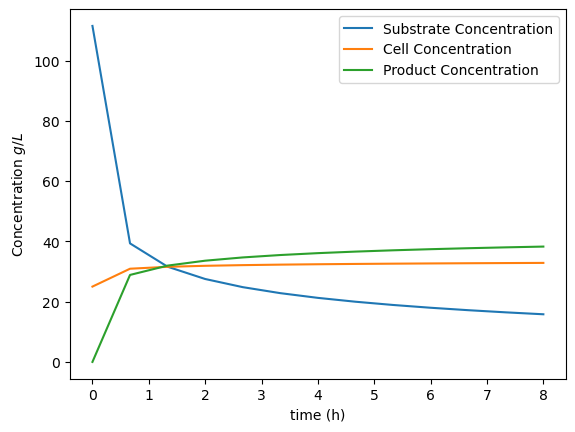

In [10]:
X0 = 25.0  # g/L
S0 = 111.5  # g/L
P0 = 0.0    # g/L
myinitialvals = [S0, X0, P0]

alpha = 4.87 #g/g
Yps = 0.4 #g/g
Yxp = 1/alpha

def myode(z, t, myparams):
    S = z[0]
    X = z[1]
    P = z[2]
    
    mu, Ks, Ki, Pmax, n = myparams
    
    g = (1-P/Pmax)**(n)
    muB = mu*S/(Ks + S + S**2/Ki)*g
    pi = muB * alpha
    sigma = pi/Yps
    
    dSdt = -sigma*X
    dXdt = muB*X
    dPdt = pi*X
    
    return ([dSdt, dXdt, dPdt])

time = np.linspace(0,8,13)

myparamsguess = (10, 5, 200, 56, 7)

mysol = odeint(myode, myinitialvals, time, args=(myparamsguess,))
print(mysol)

plt.plot(time, mysol[:,0], label = 'Substrate Concentration')
plt.plot(time, mysol[:,1], label = 'Cell Concentration')
plt.plot(time, mysol[:,2], label = 'Product Concentration')
plt.xlabel('time (h)')
plt.ylabel('Concentration $g/L$')
plt.legend()

# Getting the error

2070.928654925676


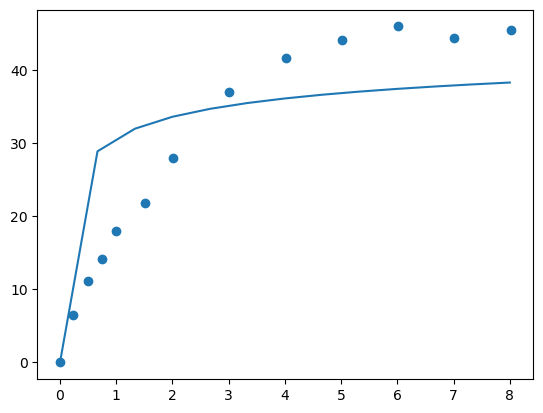

In [11]:
papertimeProd = prodpaper['Time']
paperconcProd = prodpaper['Concentration']

Prodtime = papertimeProd.tolist()
Prodconc = paperconcProd.tolist()

# print(Prodtime, Prodconc)


errorProd = np.sum((mysol[:,2] - Prodconc)**2)

print(errorProd)

# def minfunc(params, *args):

plt.plot(time, mysol[:,2], label = 'Calculated Product')
plt.scatter(Prodtime, Prodconc, label = 'Experimental Product')

## Using the minimize function

In [12]:
from scipy.optimize import minimize
from scipy.optimize import Bounds

def cost_function(params, *args):
    myparams = params
    Prodconc, time, myinitialvals = args
    
    model_output = odeint(myode, myinitialvals, time, args=(myparams,))
    
    error_P = np.sum((model_output[:, 2] - Prodconc) ** 2)
    
    return error_P

# bounds = Bounds([0.3, 6.7e-3, 120, 93, 3], [0.5, 1, 142, 120, 5])
bounds = Bounds([0.4934834, 0.0061235, 128.34832, 98.5642, 2.5645], [1, 0.89343, 140.23565, 102.543423, 4.89234123])

# 0.5,  1,  129.85, 101.65,  5
# Perform optimization using the Nelder-Mead algorithm
result = minimize(cost_function, myparamsguess, args=(Prodconc, time, myinitialvals), method='Nelder-Mead', bounds=bounds)


#method='Nelder-Mead'
#method='L-BFGS-B'
optimized_params = result.x

print("Optimized Parameters:", optimized_params)
print(result)


Optimized Parameters: [  1.           0.89343    140.23565     98.5642       4.89234123]
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 3611.0876786450544
             x: [ 1.000e+00  8.934e-01  1.402e+02  9.856e+01  4.892e+00]
           nit: 2
          nfev: 8
 final_simplex: (array([[ 1.000e+00,  8.934e-01, ...,  9.856e+01,
                         4.892e+00],
                       [ 1.000e+00,  8.934e-01, ...,  9.856e+01,
                         4.892e+00],
                       ...,
                       [ 1.000e+00,  8.934e-01, ...,  9.856e+01,
                         4.892e+00],
                       [ 1.000e+00,  8.934e-01, ...,  9.856e+01,
                         4.892e+00]]), array([ 3.611e+03,  3.611e+03,  3.611e+03,  3.611e+03,
                        3.611e+03,  3.611e+03]))


/var/folders/gw/gflpw3b111799vjqwnjtfw7w0000gn/T/ipykernel_9322/3977224157.py:19: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(cost_function, myparamsguess, args=(Prodconc, time, myinitialvals), method='Nelder-Mead', bounds=bounds)


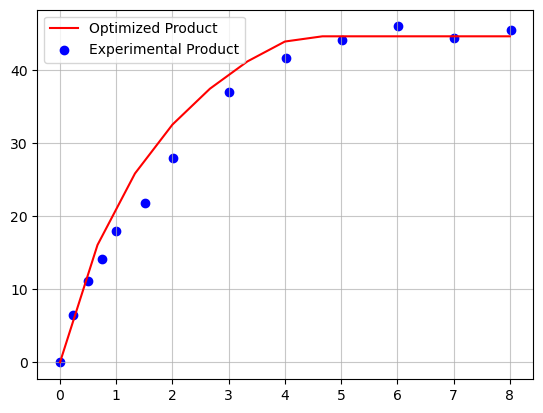

In [13]:
X0 = 25.0  # g/L
S0 = 111.5  # g/L
P0 = 0.0    # g/L
myinitialvals = [S0, X0, P0]

alpha = 4.87 #g/g
Yps = 0.4 #g/g
Yxp = 1/alpha

def myode(z, t, myparams):
    S = z[0]
    X = z[1]
    P = z[2]
    
    mu, Ks, Ki, Pmax, n = myparams
    
    g = (1-P/Pmax)**(n)
    muB = mu*S/(Ks + S + S**2/Ki)*g
    pi = muB * alpha
    sigma = pi/Yps
    
    dSdt = -sigma*X
    dXdt = muB*X
    dPdt = pi*X
    
    return ([dSdt, dXdt, dPdt])

time = np.linspace(0,8,13)

# myparamsguess = (4.664e-01,  3.238e-01,  1.557e+01,  1.897e+02,  5.387e+00)
# myparamsguess = (2.415e-01,  6.268e-03,  3.178e+01,  9.762e+01,  1.870e+00)
# myparamsguess = (0.3,  2.38304329e-02,  120,  93,  5)
# myparamsguess = (0.3,  7.5000e-03, 1.2900e+02, 1.0165e+02, 5.0000e+00)
# myparamsguess = (0.5,  1,  129.85, 101.65,  5)
myparamsguess = (0.4934834,    0.89343,    128.34832,     98.5642,       4.89234123)

mysol1 = odeint(myode, myinitialvals, time, args=(myparamsguess,))
# print(mysol)

plt.plot(time, mysol1[:,2], color = 'r', label = 'Optimized Product')
plt.scatter(Prodtime, Prodconc, color = 'b', label = 'Experimental Product')
plt.grid(alpha = 0.7)
plt.legend()
plt.show()


/var/folders/gw/gflpw3b111799vjqwnjtfw7w0000gn/T/ipykernel_9322/3353688240.py:19: RuntimeWarning: invalid value encountered in scalar power
  g = (1-P/goodPmax)**(goodn)


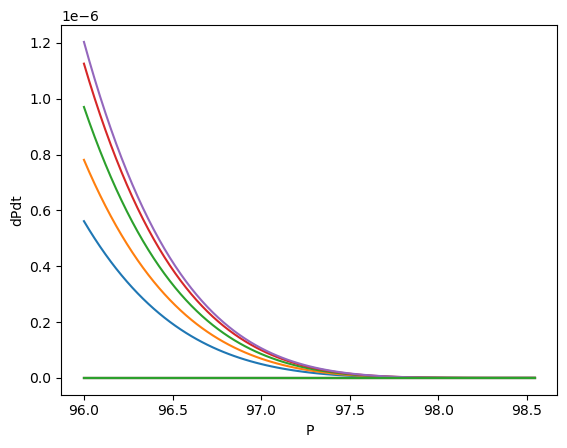

In [14]:
# g = (1-P/Pmax)**(n)
# muB = mu*S/(Ks + S + S**2/Ki)*g
# pi = muB * alpha
# sigma = pi/Yps
    
# dSdt = -sigma*X
# dXdt = muB*X
# dPdt = pi*X

goodmu = 0.4934
goodKs = 0.893
goodKi = 128.348
goodPmax = 98.56
goodn = 4.892

goodparams = goodmu, goodKs, goodKi, goodPmax, goodn

def dPdt(P):
    g = (1-P/goodPmax)**(goodn)
    muB = goodmu*S/(goodKs + S + S**2/goodKi)*g
    pi = muB * alpha
    sigma = pi/Yps
    
    dSdt = -sigma*X
    dXdt = muB*X
    dPdt = pi*X
    return dPdt

Pvalues = np.linspace(96,99,100)
dPdt_values = []
for m in Pvalues:
    dPdt_values.append(dPdt(m))
    
plt.plot(Pvalues, dPdt_values)
plt.xlabel('P')
plt.ylabel('dPdt')
# plt.ylim(0,.1e-6)
# plt.xlim(97.5, 99)
plt.show()

# Using fsolve to find steady states

basically starting over too

In [15]:
X0 = 25.0 #g/L
S0 = 111.5 #g/L
P0 = 0 #g/L

initialvals = [S0, X0, P0]

alpha = 4.87 #g/g
Yps = 0.4 #g/g
Yxp = 1/alpha

goodmu = 0.4934
goodKs = 0.893
goodKi = 128.348
goodPmax = 98.56
goodn = 4.892

# 0.6551595   26.87506472  10.13670957 429.21505531  10.13237992
goodparams = goodmu, goodKs, goodKi, goodPmax, goodn

def myode(z, t, myparams):
    S = z[0]
    X = z[1]
    P = z[2]
    
    mu, Ks, Ki, Pmax, n = myparams
    
    g = (1-P/Pmax)**(n)
    muB = mu*S/(Ks + S + S**2/Ki)*g
    pi = muB * alpha
    sigma = pi/Yps
    
    dSdt = -sigma*X
    dXdt = muB*X
    dPdt = pi*X
    
    return ([dSdt, dXdt, dPdt])

time = np.linspace(0,8,13)

def SSP(P, params):
    
    S = initialvals[0]
    X = initialvals[1]
    
    mu, Ks, Ki, Pmax, n = params
    
    g = (1-P/Pmax)**(n)
    muB = mu*S/(Ks + S + S**2/Ki)*g
    pi = muB * alpha
    sigma = pi/Yps
    
    eq = pi*X - sigma*X
    return eq

PSS = fsolve(SSP, P0, args=(goodparams,))

bold_start = "\033[1m"
bold_end = "\033[0m"

text = "From the FSolve analysis, the answer and thus the steady state is at:"

print(bold_start + text + bold_end)
print(f'{PSS[0]:0.2f}')

From the FSolve analysis, the answer and thus the steady state is at:
98.56


# Flow on a Line Analysis and Fsolve to find steady state show that there there is a steady state around 98.

**Now testing by changing value of Ki to see how the steady stte changes, essentially doing a simple bifurcation**

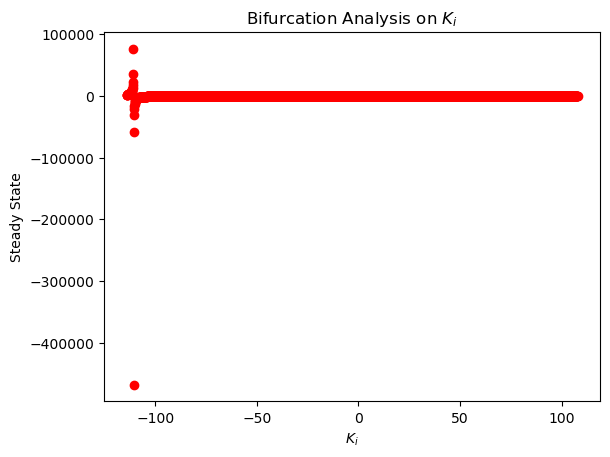

In [16]:
Kitest = np.arange(-114,108,0.1)



def BiAnalysis(Ki, params):

    mu, Ks, Pmax, n = params
    
#     mu = 0.4934
#     Ks = 0.893
# #     Ki = 128.348
#     Pmax = 98.56
#     n = 4.892
    alpha = 4.87 #g/g
    Yps = 0.4
    
    S = initialvals[0]
    X = initialvals[1]
    P = initialvals[2]
    
    g = (1-P/Pmax)**(n)
    muB = mu*S/(Ks + S + S**2/Ki)*g
    
    pi = muB * alpha
    sigma = pi/Yps
    
    dSdt = -sigma*X
    dXdt = muB*X
    dPdt = pi*X
    
    return dPdt

goodparams = [goodmu, goodKs, goodPmax, goodn]

dPdt_values = [BiAnalysis(Ki, goodparams) for Ki in Kitest]


# plt.scatter(Kitest, dPdt_values)
plt.plot(Kitest, dPdt_values, 'ro')
plt.xlabel('$K_i$')
plt.ylabel('Steady State')
plt.title('Bifurcation Analysis on $K_i$')
# plt.ylim(-100000,100000)
plt.show()



## But what if I want to test Ks by only changing Ks

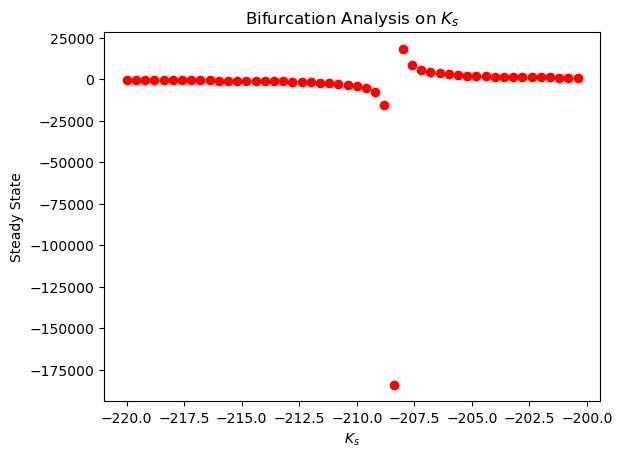

In [17]:
Kstest = np.arange(-220,-200,0.4)



def BiAnalysis(Ks, params):

    mu, Ki, Pmax, n = params
    
#     mu = 0.4934
#     Ks = 0.893
# #     Ki = 128.348
#     Pmax = 98.56
#     n = 4.892
    alpha = 4.87 #g/g
    Yps = 0.4
    
    S = initialvals[0]
    X = initialvals[1]
    P = initialvals[2]
    
    g = (1-P/Pmax)**(n)
    muB = mu*S/(Ks + S + S**2/Ki)*g
    
    pi = muB * alpha
    sigma = pi/Yps
    
    dSdt = -sigma*X
    dXdt = muB*X
    dPdt = pi*X
    
    return dPdt

goodparams = [goodmu, goodKi, goodPmax, goodn]

dPdt_values = [BiAnalysis(Ks, goodparams) for Ks in Kstest]


# plt.scatter(Kitest, dPdt_values)
plt.plot(Kstest, dPdt_values, 'ro')
plt.xlabel('$K_s$')
plt.ylabel('Steady State')
plt.title('Bifurcation Analysis on $K_s$')
plt.show()

## Bifurcation Analysis on Pmax

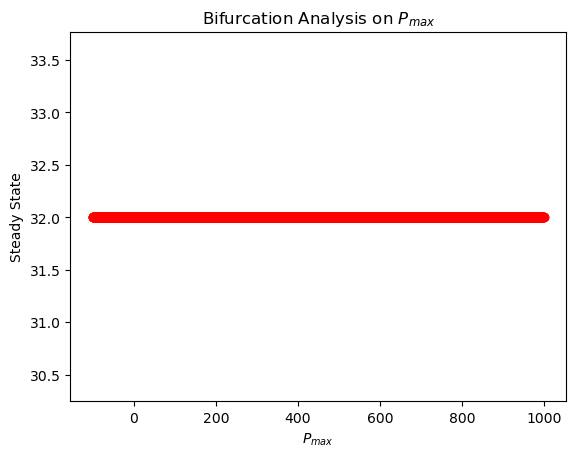

In [18]:
Pmaxtest = np.arange(-100,1000,0.4)

def BiAnalysis(Pmax, params):

    mu, Ks, Ki, n = params
    alpha = 4.87 #g/g
    Yps = 0.4
    
    S = initialvals[0]
    X = initialvals[1]
    P = initialvals[2]
    
    g = (1-P/Pmax)**(n)
    muB = mu*S/(Ks + S + S**2/Ki)*g
    pi = muB * alpha
    sigma = pi/Yps
    
    dSdt = -sigma*X
    dXdt = muB*X
    dPdt = pi*X
    return dPdt

goodparams = [goodmu, goodKs, goodKi, goodn]
dPdt_values = [BiAnalysis(Pmax, goodparams) for Pmax in Pmaxtest]


# plt.scatter(Kitest, dPdt_values)
plt.plot(Pmaxtest, dPdt_values, 'ro')
plt.xlabel('$P_{max}$')
plt.ylabel('Steady State')
plt.title("Bifurcation Analysis on $P_{max}$")
plt.show()

## Bifurcation Analysis on n

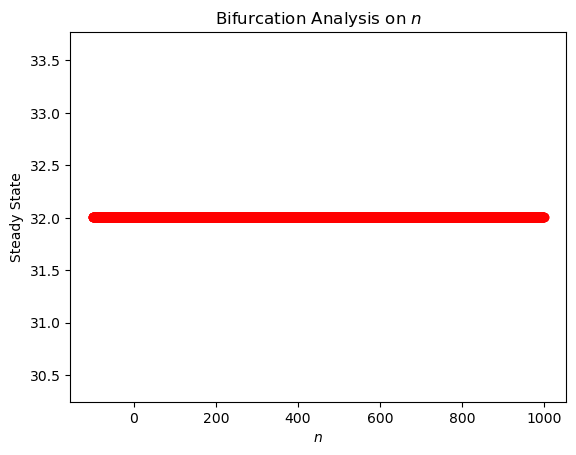

In [19]:
ntest = np.arange(-100,1000,0.4)



def BiAnalysis(n, params):

    mu, Ks, Ki, Pmax = params
    
#     mu = 0.4934
#     Ks = 0.893
# #     Ki = 128.348
#     Pmax = 98.56
#     n = 4.892
    alpha = 4.87 #g/g
    Yps = 0.4
    
    S = initialvals[0]
    X = initialvals[1]
    P = initialvals[2]
    
    g = (1-P/Pmax)**(n)
    muB = mu*S/(Ks + S + S**2/Ki)*g
    
    pi = muB * alpha
    sigma = pi/Yps
    
    dSdt = -sigma*X
    dXdt = muB*X
    dPdt = pi*X
    
    return dPdt

goodparams = [goodmu, goodKs, goodKi, goodPmax]

dPdt_values = [BiAnalysis(n, goodparams) for n in ntest]


# plt.scatter(Kitest, dPdt_values)
plt.plot(Pmaxtest, dPdt_values, 'ro')
plt.xlabel('$n$')
plt.ylabel('Steady State')
plt.title('Bifurcation Analysis on $n$')
plt.show()

In [20]:
# from matplotlib import cm

# def ode(z, t, params):
#     S, X, P = z
#     mu, Ks, Ki, Pmax, n, alpha, Yps = params
    
#     g = (1 - P / Pmax)**(n)
#     muB = mu * S / (Ks + S + S**2 / Ki) * g
#     pi = muB * alpha
#     sigma = pi / Yps
    
#     dSdt = -sigma * X
#     dXdt = muB * X
#     dPdt = pi * X
    
#     return [dSdt, dXdt, dPdt]


# Ks = 6.10e-3
# mu = 0.1
# Pmax = 10.0
# n = 2.0
# alpha = 4.87
# Yps = 0.4

# S0 = 111.5  # g/L
# X0 = 25.0   # g/L
# P0 = 0.0    # g/L
# initialvals = [S0, X0, P0]


# time = np.linspace(0, 10, 200)


# Ki_values = np.linspace(135, 145, 50)

# cmap = cm.get_cmap('viridis')

# for Ki in Ki_values:
#     params = [mu, Ks, Ki, Pmax, n, alpha, Yps]
#     ans = odeint(ode, initialvals, time, args=(params,))
    
#     plt.plot(time, ans[:, 2], color=cmap((Ki - 135) / 10), label=f'Ki = {Ki:.2f}')

# sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=135, vmax=145))

# plt.colorbar(sm, label='Ki')

# plt.xlabel('Time')
# plt.ylabel('P')
# plt.title('Bifurcation Analysis for Product (P) with Ki')
# # plt.ylim(0,1)
# plt.show()


In [21]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.integrate import odeint

# def ode_functions(z, t, params):
#     S, X, P = z
#     mu, Ks, Ki, Pmax, n, alpha, Yps = params

#     g = (1 - P / Pmax)**(n)
#     muB = mu * S / (Ks + S + S**2 / Ki) * g
#     pi = muB * alpha
#     sigma = pi / Yps

#     dSdt = -sigma * X
#     dXdt = muB * X
#     dPdt = pi * X
    
#     return [dSdt, dXdt, dPdt]

# initialvals = [S0, X0, P0]

# out_P = []
# out_t = []
# out_Ks = []

# for Ks in np.linspace(0.1, 2.0, 100):
#     params = [mu, Ks, Ki, Pmax, n, alpha, Yps]

#     # Solve the ODE for each value of Ks
#     z = odeint(ode_functions, initialvals, time, args=(params,))
#     P = z[:, 2]

#     # Collect data for plotting
#     out_P = np.append(out_P, P)
#     out_t = np.append(out_t, time)
#     out_Ks = np.append(out_Ks, [Ks] * len(time))

#     # Update initial conditions for the next loop
#     initialvals = [z[-1, 0], z[-1, 1], z[-1, 2]]

# # Plot bifurcation analysis for dPdt with respect to Ks
# plt.rcParams.update({'font.size': 14})
# plt.xlabel("time")
# plt.ylabel("P")

# from matplotlib import colors

# cmap = plt.cm.rainbow
# norm = colors.BoundaryNorm(np.linspace(0.1, 2.0, 100), cmap.N)

# plt.scatter(out_t, out_P, c=out_Ks, cmap=cmap, norm=norm)
# cbar = plt.colorbar(ticks=np.linspace(0.1, 2.0, 9))
# cbar.set_label('Ks values')

# plt.title('Bifurcation Analysis for dP/dt with varying Ks')
# plt.show()


In [22]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.integrate import odeint
# from matplotlib import colors

# def ode_functions(z, t, params):
#     S, X, P = z
#     mu, Ks, Ki, Pmax, n, alpha, Yps = params

#     g = (1 - P / Pmax)**(n)
#     muB = mu * S / (Ks + S + S**2 / Ki) * g
#     pi = muB * alpha
#     sigma = pi / Yps

#     dSdt = -sigma * X
#     dXdt = muB * X
#     dPdt = pi * X
    
#     return [dSdt, dXdt, dPdt]

# mu = 0.1
# Ks = 6.1e-3
# Pmax = 10.0
# n = 2.0
# alpha = 4.87
# Yps = 0.4

# initialvals = [S0, X0, P0]
# time = np.linspace(0, 10, 200)

# # Set variables to collect later
# out_P = []
# out_t = []
# out_Ki = []

# # goodmu, goodKi, goodPmax, goodn
# for Ki in np.linspace(135, 145, 100):
#     params = [goodmu, goodKs, goodKi, goodPmax, goodn, alpha, Yps]

#     # Solve the ODE for each value of Ki
#     z = odeint(ode_functions, initialvals, time, args=(params,))
#     P = z[:, 2]

#     # Collect data for plotting
#     out_P = np.append(out_P, P)
#     out_t = np.append(out_t, time)
#     out_Ki = np.append(out_Ki, [Ki] * len(time))

#     # Update initial conditions for the next loop
#     initialvals = [z[-1, 0], z[-1, 1], z[-1, 2]]


# plt.rcParams.update({'font.size': 14})
# plt.xlabel("time")
# plt.ylabel("P")

# cmap = plt.cm.rainbow
# norm = colors.BoundaryNorm(np.linspace(135, 145, 100), cmap.N)

# plt.scatter(out_t, out_P, c=out_Ki, cmap=cmap, norm=norm)
# cbar = plt.colorbar(ticks=np.linspace(135, 145, 9))
# cbar.set_label('Ki values')

# plt.title('Bifurcation Analysis for dP/dt with varying Ki')
# plt.show()


In [23]:
# # Import the required modules
# import numpy as np
# import math
# import matplotlib.pyplot as plt
# %matplotlib inline
# from scipy.integrate import odeint

# import time

# def dxdt(x,t,r):
#     S = x[0]
#     X = x[1]
#     P = x[2]
    
#     mu, Ks, Ki, Pmax, n = params1
    
#     g = (1-P/Pmax)**(n)
#     muB = mu*S/(Ks + S + S**2/Ki)*g
#     pi = muB * alpha
#     sigma = pi/Yps
    
#     dSdt = -sigma*X
#     dXdt = muB*X
#     dPdt = pi*X
    
    
#     return np.array([dSdt, dXdt, dPdt])


# timesteps = np.arange(0,40,0.01)
# mu = 0.5
# Ks = 6.1e-3
# Pmax = 94.2 
# n = 4.12

# X0 = 25.0 #g/L
# S0 = 111.5 #g/L
# P0 = 0 #g/L

# initvals = np.array([X0, S0, P0])


# # Set variables to collect later.
# out_x = out_t = out_r= [];

# for r in np.arange(125,135,1):

#     # args must be a tuple, which is annnoying. A 1 element tuple needs a comma.
#     # This doesn't effect tuples of more elements
#     x = odeint(dxdt, initvals, timesteps, args=(r,))

#     # Collect data for plotting
#     out_x = np.append(out_x, x[:, 2]);
#     out_t = np.append(out_t,timesteps);
#     out_r = np.append(out_r,[r]*len(timesteps));
    
#     # Update time steps and initial conditions for next loop
#     timesteps = timesteps+1;
#     initvals = x[-1] + 10**-12;
    
# # Plot result. Have to do some fancy foot work to get a discrete colorbar
# plt.rcParams.update({'font.size': 14})  # increase the font size
# plt.xlabel("time")
# plt.ylabel("x")
# from matplotlib import colors
# cmap = plt.cm.rainbow
# norm = colors.BoundaryNorm(np.arange(125,135,1), cmap.N)
# plt.scatter(out_t, out_x, c= out_r,cmap=cmap, norm=norm);
# cbar = plt.colorbar(ticks=np.linspace(125,135, 10))
# cbar.set_label('r values');



## Now doing sensitivity analysis. First 1% Sensitivity.

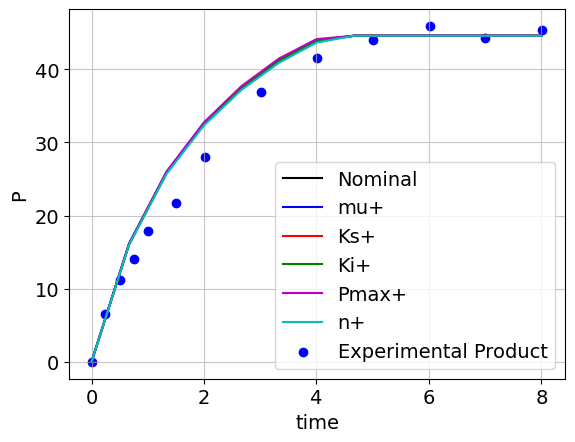

In [24]:
X0 = 25.0  # g/L
S0 = 111.5  # g/L
P0 = 0.0    # g/L

alpha = 4.87 #g/g
Yps = 0.4 #g/g
Yxp = 1/alpha

def func(x,t, mu, Ks, Ki, Pmax, n):
    S, X, P = x;
    
    
#     mu, Ks, Ki, Pmax, n = params
    
    g = (1-P/Pmax)**(n)
    muB = mu*S/(Ks + S + S**2/Ki)*g
    pi = muB * alpha
    sigma = pi/Yps
    
    dSdt = -sigma*X
    dXdt = muB*X
    dPdt = pi*X
    
    return ([dSdt, dXdt, dPdt])


timesteps = np.linspace(0,8,13)
y0 = [S0,X0,P0]

y = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348, 98.56, 4.892))

y1 = odeint(func, y0, timesteps, args = (0.4934*1.01, 0.893, 128.348, 98.56, 4.892))
y2 = odeint(func, y0, timesteps, args = (0.4934, 0.893*1.01, 128.348, 98.56, 4.892))
y3 = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348*1.01, 98.56, 4.892))
y4 = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348, 98.56*1.01, 4.892))
y5 = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348, 98.56, 4.892*1.01))


# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("P")
plt.plot(timesteps, y[:,2],'k', label = "Nominal");
plt.plot(timesteps, y1[:,2],'b', label = "mu+");
plt.plot(timesteps, y2[:,2],'r', label = "Ks+");
plt.plot(timesteps, y3[:,2],'g', label = "Ki+");
plt.plot(timesteps, y4[:,2],'m', label = "Pmax+");
plt.plot(timesteps, y5[:,2],'c', label = "n+");
plt.scatter(Prodtime, Prodconc, color = 'b', label = 'Experimental Product')
plt.grid(alpha = 0.7)
plt.legend()

# plt.plot(time, mysol1[:,2], color = 'r', label = 'Optimized Product')
# plt.scatter(Prodtime, Prodconc, color = 'b', label = 'Experimental Product')

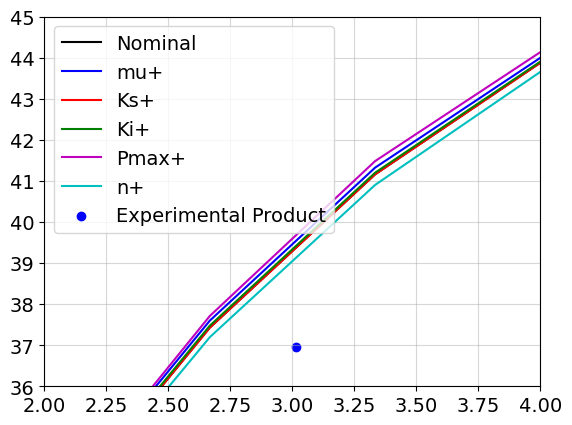

In [25]:
plt.plot(timesteps, y[:,2],'k', label = "Nominal");
plt.plot(timesteps, y1[:,2],'b', label = "mu+");
plt.plot(timesteps, y2[:,2],'r', label = "Ks+");
plt.plot(timesteps, y3[:,2],'g', label = "Ki+");
plt.plot(timesteps, y4[:,2],'m', label = "Pmax+");
plt.plot(timesteps, y5[:,2],'c', label = "n+");
plt.scatter(Prodtime, Prodconc, color = 'b', label = 'Experimental Product')
plt.grid(alpha = 0.7)
plt.xlim(2,4)
plt.ylim(36,45)
plt.grid(alpha=0.5)
plt.legend()

In [26]:
# # Calculate relative sensitivity for mu
# plt.plot(timesteps, ((y1[:,2] - y[:,2])/y[:,2])/0.01, 'b', label="mu")
# # Calculate relative sensitivity for Pmax
# plt.plot(timesteps, ((y4[:,2] - y[:,2])/y[:,2])/0.01, 'r', label="Pmax")
# # Calculate relative sensitivity for n
# plt.plot(timesteps, ((y5[:,2] - y[:,2])/y[:,2])/0.01, 'g', label="n")


## Trying it a different way. I took the 1% in the other way, multiplying it by 0.99.

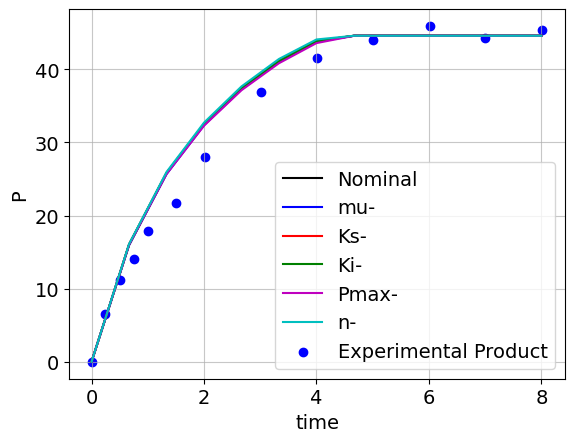

In [27]:
X0 = 25.0  # g/L
S0 = 111.5  # g/L
P0 = 0.0    # g/L

alpha = 4.87 #g/g
Yps = 0.4 #g/g
Yxp = 1/alpha

def func(x,t, mu, Ks, Ki, Pmax, n):
    S, X, P = x;
    
    
#     mu, Ks, Ki, Pmax, n = params
    
    g = (1-P/Pmax)**(n)
    muB = mu*S/(Ks + S + S**2/Ki)*g
    pi = muB * alpha
    sigma = pi/Yps
    
    dSdt = -sigma*X
    dXdt = muB*X
    dPdt = pi*X
    
    return ([dSdt, dXdt, dPdt])

# goodmu = 0.4934
# goodKs = 0.893
# goodKi = 128.348
# goodPmax = 98.56
# goodn = 4.892

# goodparams = goodmu, goodKs, goodKi, goodPmax, goodn


timesteps = np.linspace(0,8,13)
# y0 = [5,0.1]
# y0 = [25.0 , 111.5, 0.0];
y0 = [S0,X0,P0]

y = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348, 98.56, 4.892))
# y1 = odeint(func, y0, timesteps, args = (25*1.01,1,1))
y1 = odeint(func, y0, timesteps, args = (0.4934*0.99, 0.893, 128.348, 98.56, 4.892))
# y2 = odeint(func, y0, timesteps, args = (50,1*1.01,1))
y2 = odeint(func, y0, timesteps, args = (0.4934, 0.893*0.99, 128.348, 98.56, 4.892))
# y3 = odeint(func, y0, timesteps, args = (50,1,1*1.01))
y3 = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348*0.99, 98.56, 4.892))
y4 = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348, 98.56*0.99, 4.892))
y5 = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348, 98.56, 4.892*0.99))


# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("P")
plt.plot(timesteps, y[:,2],'k', label = "Nominal");
plt.plot(timesteps, y1[:,2],'b', label = "mu-");
plt.plot(timesteps, y2[:,2],'r', label = "Ks-");
plt.plot(timesteps, y3[:,2],'g', label = "Ki-");
plt.plot(timesteps, y4[:,2],'m', label = "Pmax-");
plt.plot(timesteps, y5[:,2],'c', label = "n-");
plt.scatter(Prodtime, Prodconc, color = 'b', label = 'Experimental Product')
plt.grid(alpha = 0.7)
plt.legend()

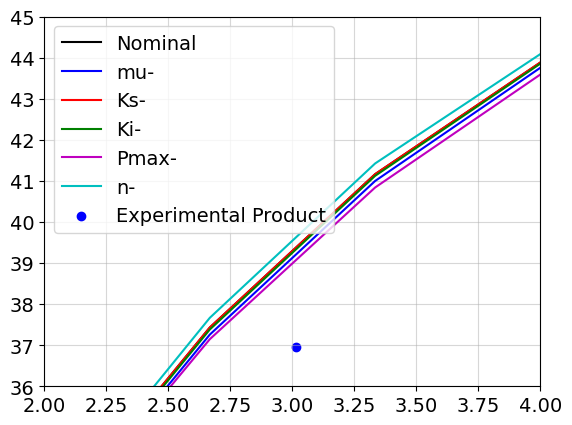

In [28]:
plt.plot(timesteps, y[:,2],'k', label = "Nominal");
plt.plot(timesteps, y1[:,2],'b', label = "mu-");
plt.plot(timesteps, y2[:,2],'r', label = "Ks-");
plt.plot(timesteps, y3[:,2],'g', label = "Ki-");
plt.plot(timesteps, y4[:,2],'m', label = "Pmax-");
plt.plot(timesteps, y5[:,2],'c', label = "n-");
plt.scatter(Prodtime, Prodconc, color = 'b', label = 'Experimental Product')
plt.grid(alpha = 0.7)
plt.xlim(2,4)
plt.ylim(36,45)
plt.grid(alpha=0.5)
plt.legend()

# Doing a 5% Analysis Next

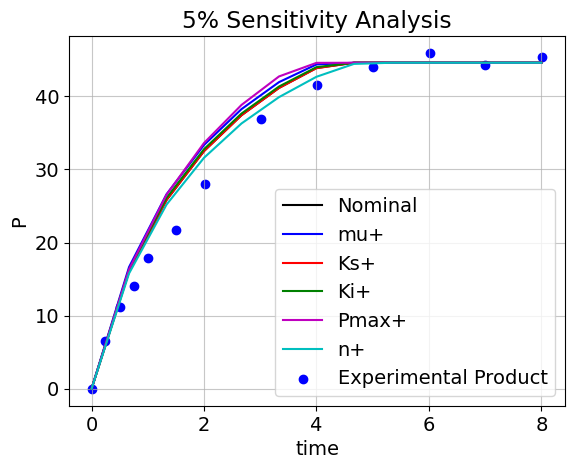

In [29]:
X0 = 25.0  # g/L
S0 = 111.5  # g/L
P0 = 0.0    # g/L

alpha = 4.87 #g/g
Yps = 0.4 #g/g
Yxp = 1/alpha

def func(x,t, mu, Ks, Ki, Pmax, n):
    S, X, P = x;
    
    
#     mu, Ks, Ki, Pmax, n = params
    
    g = (1-P/Pmax)**(n)
    muB = mu*S/(Ks + S + S**2/Ki)*g
    pi = muB * alpha
    sigma = pi/Yps
    
    dSdt = -sigma*X
    dXdt = muB*X
    dPdt = pi*X
    
    return ([dSdt, dXdt, dPdt])


timesteps = np.linspace(0,8,13)
y0 = [S0,X0,P0]

y = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348, 98.56, 4.892))

y1 = odeint(func, y0, timesteps, args = (0.4934*1.05, 0.893, 128.348, 98.56, 4.892))
y2 = odeint(func, y0, timesteps, args = (0.4934, 0.893*1.05, 128.348, 98.56, 4.892))
y3 = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348*1.05, 98.56, 4.892))
y4 = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348, 98.56*1.05, 4.892))
y5 = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348, 98.56, 4.892*1.05))


# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("P")
plt.plot(timesteps, y[:,2],'k', label = "Nominal");
plt.plot(timesteps, y1[:,2],'b', label = "mu+");
plt.plot(timesteps, y2[:,2],'r', label = "Ks+");
plt.plot(timesteps, y3[:,2],'g', label = "Ki+");
plt.plot(timesteps, y4[:,2],'m', label = "Pmax+");
plt.plot(timesteps, y5[:,2],'c', label = "n+");
plt.scatter(Prodtime, Prodconc, color = 'b', label = 'Experimental Product')
plt.grid(alpha = 0.7)
plt.title('5% Sensitivity Analysis')
plt.legend()

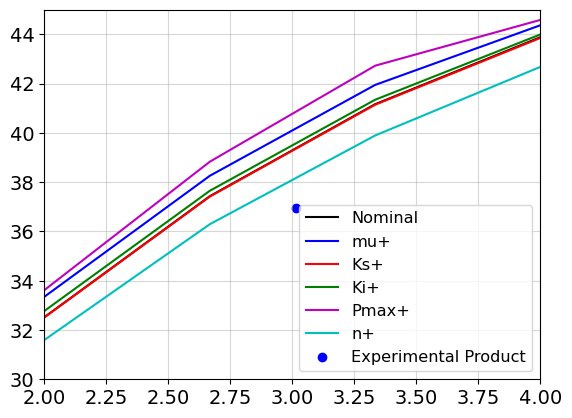

In [30]:
plt.plot(timesteps, y[:,2],'k', label = "Nominal");
plt.plot(timesteps, y1[:,2],'b', label = "mu+");
plt.plot(timesteps, y2[:,2],'r', label = "Ks+");
plt.plot(timesteps, y3[:,2],'g', label = "Ki+");
plt.plot(timesteps, y4[:,2],'m', label = "Pmax+");
plt.plot(timesteps, y5[:,2],'c', label = "n+");
plt.scatter(Prodtime, Prodconc, color = 'b', label = 'Experimental Product')
plt.grid(alpha = 0.7)
plt.xlim(2,4)
plt.ylim(30,45)
plt.grid(alpha=0.5)
plt.legend(fontsize = 'small')

## 5% in the other direction

34.15811088295881


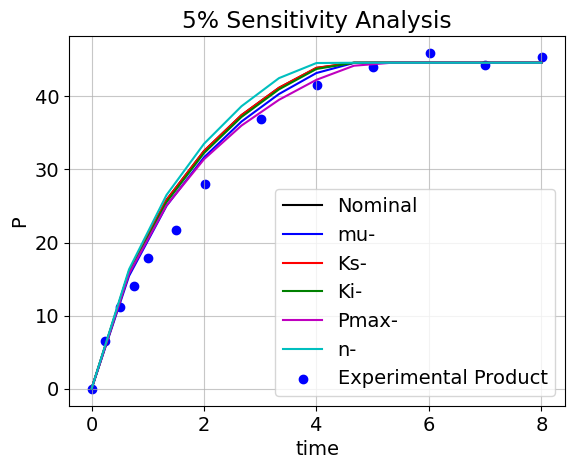

In [31]:
X0 = 25.0  # g/L
S0 = 111.5  # g/L
P0 = 0.0    # g/L

alpha = 4.87 #g/g
Yps = 0.4 #g/g
Yxp = 1/alpha

def func(x,t, mu, Ks, Ki, Pmax, n):
    S, X, P = x;
    
    
#     mu, Ks, Ki, Pmax, n = params
    
    g = (1-P/Pmax)**(n)
    muB = mu*S/(Ks + S + S**2/Ki)*g
    pi = muB * alpha
    sigma = pi/Yps
    
    dSdt = -sigma*X
    dXdt = muB*X
    dPdt = pi*X
    
    return ([dSdt, dXdt, dPdt])


timesteps = np.linspace(0,8,13)
y0 = [S0,X0,P0]

y = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348, 98.56, 4.892))

y1 = odeint(func, y0, timesteps, args = (0.4934*0.95, 0.893, 128.348, 98.56, 4.892))
y2 = odeint(func, y0, timesteps, args = (0.4934, 0.893*0.95, 128.348, 98.56, 4.892))
y3 = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348*0.95, 98.56, 4.892))
y4 = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348, 98.56*0.95, 4.892))
y5 = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348, 98.56, 4.892*0.95))


# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("P")
plt.plot(timesteps, y[:,2],'k', label = "Nominal");
plt.plot(timesteps, y1[:,2],'b', label = "mu-");
plt.plot(timesteps, y2[:,2],'r', label = "Ks-");
plt.plot(timesteps, y3[:,2],'g', label = "Ki-");
plt.plot(timesteps, y4[:,2],'m', label = "Pmax-");
plt.plot(timesteps, y5[:,2],'c', label = "n-");
plt.scatter(Prodtime, Prodconc, color = 'b', label = 'Experimental Product')
plt.grid(alpha = 0.7)
plt.title('5% Sensitivity Analysis')
plt.legend()
print(y[-1,1])

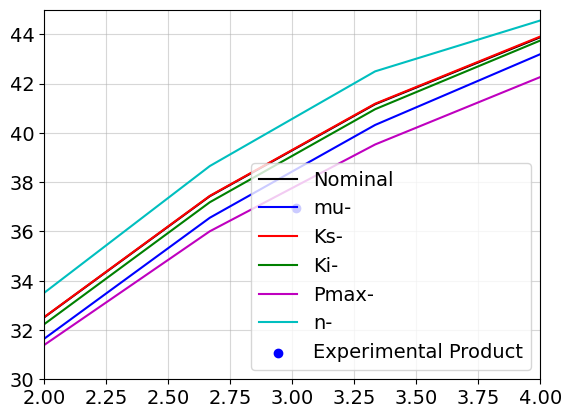

In [32]:
plt.plot(timesteps, y[:,2],'k', label = "Nominal");
plt.plot(timesteps, y1[:,2],'b', label = "mu-");
plt.plot(timesteps, y2[:,2],'r', label = "Ks-");
plt.plot(timesteps, y3[:,2],'g', label = "Ki-");
plt.plot(timesteps, y4[:,2],'m', label = "Pmax-");
plt.plot(timesteps, y5[:,2],'c', label = "n-");
plt.scatter(Prodtime, Prodconc, color = 'b', label = 'Experimental Product')
plt.grid(alpha = 0.7)
plt.xlim(2,4)
plt.ylim(30,45)
plt.grid(alpha=0.5)
plt.legend()

# Lastly a 10% Analysis in both directions.

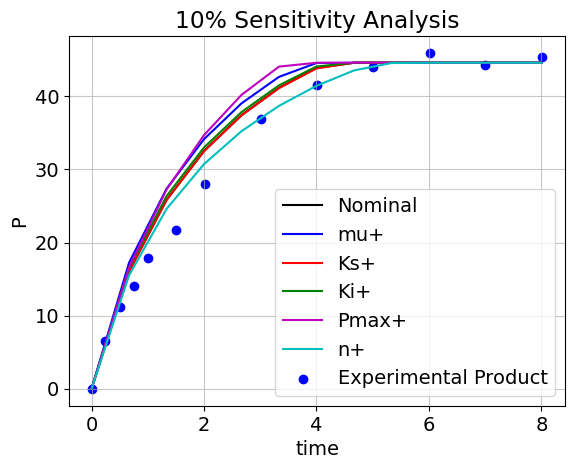

In [33]:
X0 = 25.0  # g/L
S0 = 111.5  # g/L
P0 = 0.0    # g/L

alpha = 4.87 #g/g
Yps = 0.4 #g/g
Yxp = 1/alpha

def func(x,t, mu, Ks, Ki, Pmax, n):
    S, X, P = x;
    
    
#     mu, Ks, Ki, Pmax, n = params
    
    g = (1-P/Pmax)**(n)
    muB = mu*S/(Ks + S + S**2/Ki)*g
    pi = muB * alpha
    sigma = pi/Yps
    
    dSdt = -sigma*X
    dXdt = muB*X
    dPdt = pi*X
    
    return ([dSdt, dXdt, dPdt])


timesteps = np.linspace(0,8,13)
y0 = [S0,X0,P0]

y = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348, 98.56, 4.892))

y1 = odeint(func, y0, timesteps, args = (0.4934*1.1, 0.893, 128.348, 98.56, 4.892))
y2 = odeint(func, y0, timesteps, args = (0.4934, 0.893*1.1, 128.348, 98.56, 4.892))
y3 = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348*1.1, 98.56, 4.892))
y4 = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348, 98.56*1.1, 4.892))
y5 = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348, 98.56, 4.892*1.1))


# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("P")
plt.plot(timesteps, y[:,2],'k', label = "Nominal");
plt.plot(timesteps, y1[:,2],'b', label = "mu+");
plt.plot(timesteps, y2[:,2],'r', label = "Ks+");
plt.plot(timesteps, y3[:,2],'g', label = "Ki+");
plt.plot(timesteps, y4[:,2],'m', label = "Pmax+");
plt.plot(timesteps, y5[:,2],'c', label = "n+");
plt.scatter(Prodtime, Prodconc, color = 'b', label = 'Experimental Product')
plt.grid(alpha = 0.7)
plt.title('10% Sensitivity Analysis')
plt.legend()

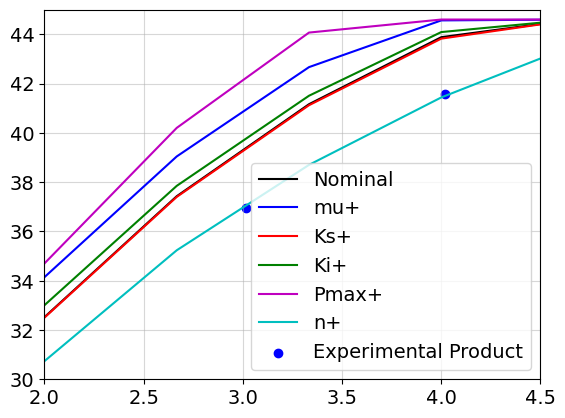

In [34]:
plt.plot(timesteps, y[:,2],'k', label = "Nominal");
plt.plot(timesteps, y1[:,2],'b', label = "mu+");
plt.plot(timesteps, y2[:,2],'r', label = "Ks+");
plt.plot(timesteps, y3[:,2],'g', label = "Ki+");
plt.plot(timesteps, y4[:,2],'m', label = "Pmax+");
plt.plot(timesteps, y5[:,2],'c', label = "n+");
plt.scatter(Prodtime, Prodconc, color = 'b', label = 'Experimental Product')
plt.grid(alpha = 0.7)
plt.xlim(2,4.5)
plt.ylim(30,45)
plt.grid(alpha=0.5)
plt.legend()

## 10 % in the other Direction.

34.15811088295881


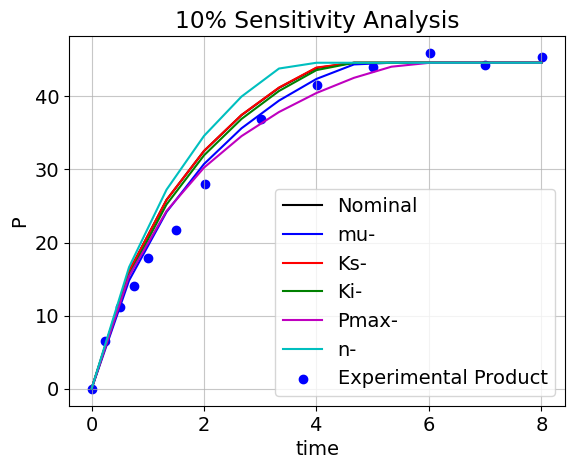

In [35]:
X0 = 25.0  # g/L
S0 = 111.5  # g/L
P0 = 0.0    # g/L

alpha = 4.87 #g/g
Yps = 0.4 #g/g
Yxp = 1/alpha

def func(x,t, mu, Ks, Ki, Pmax, n):
    S, X, P = x;
    
    
#     mu, Ks, Ki, Pmax, n = params
    
    g = (1-P/Pmax)**(n)
    muB = mu*S/(Ks + S + S**2/Ki)*g
    pi = muB * alpha
    sigma = pi/Yps
    
    dSdt = -sigma*X
    dXdt = muB*X
    dPdt = pi*X
    
    return ([dSdt, dXdt, dPdt])


timesteps = np.linspace(0,8,13)
y0 = [S0,X0,P0]

y = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348, 98.56, 4.892))

y1 = odeint(func, y0, timesteps, args = (0.4934*0.9, 0.893, 128.348, 98.56, 4.892))
y2 = odeint(func, y0, timesteps, args = (0.4934, 0.893*0.9, 128.348, 98.56, 4.892))
y3 = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348*0.9, 98.56, 4.892))
y4 = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348, 98.56*0.9, 4.892))
y5 = odeint(func, y0, timesteps, args = (0.4934, 0.893, 128.348, 98.56, 4.892*0.9))


# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("P")
plt.plot(timesteps, y[:,2],'k', label = "Nominal");
plt.plot(timesteps, y1[:,2],'b', label = "mu-");
plt.plot(timesteps, y2[:,2],'r', label = "Ks-");
plt.plot(timesteps, y3[:,2],'g', label = "Ki-");
plt.plot(timesteps, y4[:,2],'m', label = "Pmax-");
plt.plot(timesteps, y5[:,2],'c', label = "n-");
plt.scatter(Prodtime, Prodconc, color = 'b', label = 'Experimental Product')
plt.grid(alpha = 0.7)
plt.title('10% Sensitivity Analysis')
plt.legend()
print(y[-1,1])

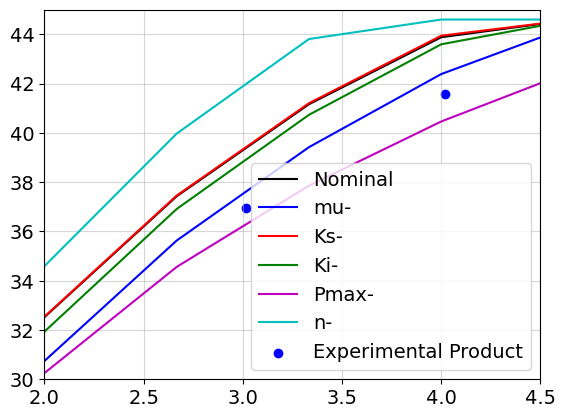

In [36]:
plt.plot(timesteps, y[:,2],'k', label = "Nominal");
plt.plot(timesteps, y1[:,2],'b', label = "mu-");
plt.plot(timesteps, y2[:,2],'r', label = "Ks-");
plt.plot(timesteps, y3[:,2],'g', label = "Ki-");
plt.plot(timesteps, y4[:,2],'m', label = "Pmax-");
plt.plot(timesteps, y5[:,2],'c', label = "n-");
plt.scatter(Prodtime, Prodconc, color = 'b', label = 'Experimental Product')
plt.grid(alpha = 0.7)
plt.xlim(2,4.5)
plt.ylim(30,45)
plt.grid(alpha=0.5)
plt.legend()

## Global Sensitivity Analysis

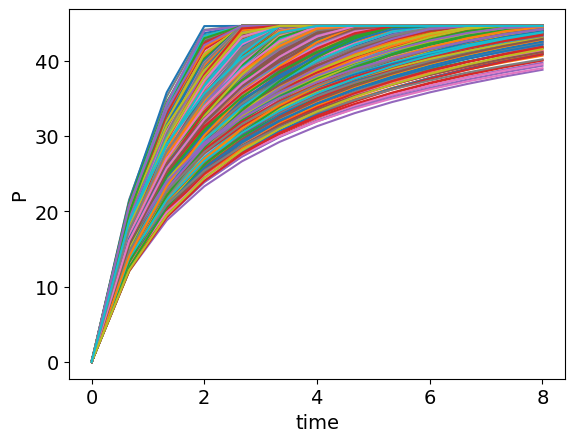

In [43]:
X0 = 25.0  # g/L
S0 = 111.5  # g/L
P0 = 0.0    # g/L

alpha = 4.87 #g/g
Yps = 0.4 #g/g
Yxp = 1/alpha

def func(x,t, mu, Ks, Ki, Pmax, n):
    S, X, P = x;
    
    
#     mu, Ks, Ki, Pmax, n = params
    
    g = (1-P/Pmax)**(n)
    muB = mu*S/(Ks + S + S**2/Ki)*g
    pi = muB * alpha
    sigma = pi/Yps
    
    dSdt = -sigma*X
    dXdt = muB*X
    dPdt = pi*X
    
    return ([dSdt, dXdt, dPdt])

timesteps = np.linspace(0,8,13)
y0 = [S0,X0,P0]

goodmu = 0.4934
goodKs = 0.893
goodKi = 128.348
goodPmax = 98.56
goodn = 4.892

goodparams = goodmu, goodKs, goodKi, goodPmax, goodn

N = 1000;
goodmu = np.random.uniform(0.4934*.8,0.4934*1.2,N)
goodKs = np.random.uniform(0.893*.8,0.893*1.2,N)
goodKi = np.random.uniform(128.348*.8,128.348*1.2,N)
goodPmax = np.random.uniform(98.56*.8,98.56*1.2,N)
goodn = np.random.uniform(4.892*.8,4.892*1.2,N)


P = np.zeros(N);

for m in np.arange(0,N,1):
    output = odeint(func, y0, timesteps, args = (goodmu[m], goodKs[m], goodKi[m], goodPmax[m], goodn[m]))
    plt.plot(timesteps,output[:,2])
    plt.xlabel('time')
    plt.ylabel('P')
    P[m] = output[-1,1]

## Seaborn showing

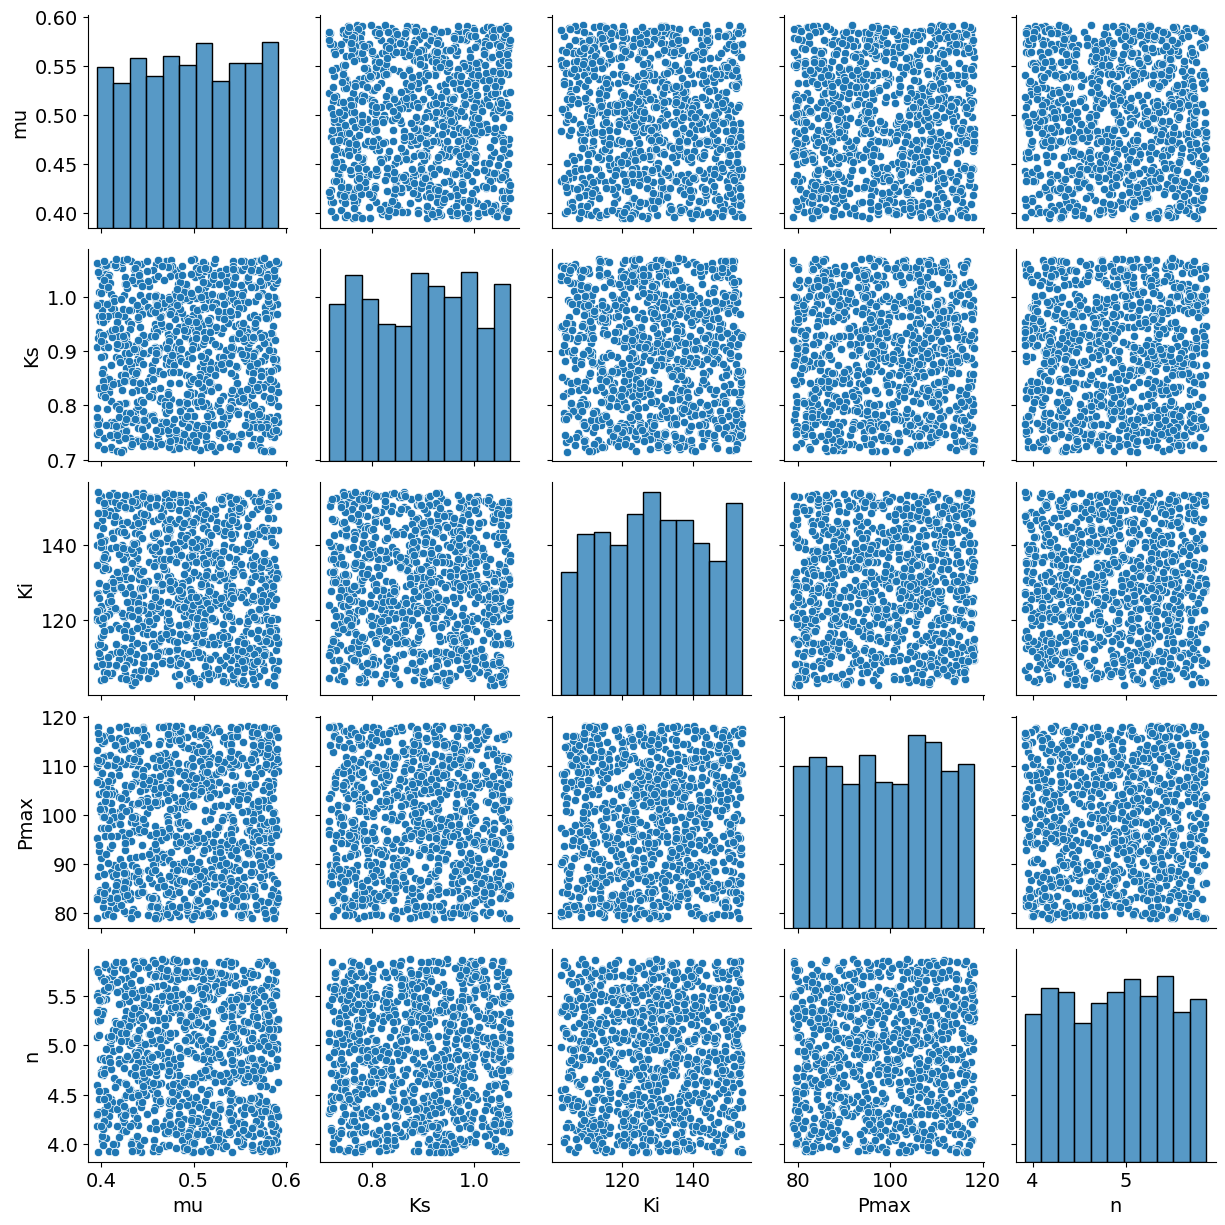

In [44]:
# Plot histograms of sampled parameter space
import pandas as pd
import seaborn as sns

tmp = {'mu':goodmu, 'Ks':goodKs, 'Ki':goodKi, 'Pmax':goodPmax, 'n':goodn};
df = pd.DataFrame(tmp);
del(tmp)

sns.pairplot(df)
20
plt.show()

# Fitting the equation using Least Squared

In [45]:

y = (34-P)/34

X = np.c_[(0.4943-goodmu)/0.4943,(0.8943-goodKs)/0.8943,(128.348-goodKi)/128.348,(98.564-goodPmax)/98.564,(4.89-goodn)/4.89]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X));

params = tmp @ np.transpose(X) @ y;

params

# print(f"Our fitted equn is y = {params[0]:.3f} mu + {params[1]:0.3f} Ks + {params[2]:0.3f}, Ki + {params[3]:0.3f}, Pmax +
#      {params[4]:0.3f}')

bold_start = "\033[1m"
bold_end = "\033[0m"

text = "Our fitted equation is y = 0.004mu - 0.001Ks + 0.001Ki + 0.010Pmax - 0.011n"

print(params)
print(bold_start + text + bold_end)


# plt.plot(y,X @ params,"o");
# plt.ylabel("Predicted P");
# plt.xlabel("Actual P");


import statsmodels.api as sm
model = sm.OLS(y, X).fit()
print(model.summary())


[ 0.00599496 -0.00070128  0.00352571  0.01309579 -0.00970239]
Our fitted equation is y = 0.004mu - 0.001Ks + 0.001Ki + 0.010Pmax - 0.011n
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.138
Model:                            OLS   Adj. R-squared (uncentered):              0.133
Method:                 Least Squares   F-statistic:                              31.76
Date:                Thu, 14 Dec 2023   Prob (F-statistic):                    4.40e-30
Time:                        23:34:14   Log-Likelihood:                          3855.5
No. Observations:                1000   AIC:                                     -7701.
Df Residuals:                     995   BIC:                                     -7676.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                 

# The Sensitivity Analysis Plots tell us the parameter 'n' and 'Pmax' are both equally affecting on the model.

## Moreover, Ks does not affect the model at all so that parameter does not need to be considered.

# Extra Work, in case it's needed


### we can minimize it again focusing on n and Pmax.

In [40]:
# X0 = 25.0  # g/L
# S0 = 111.5  # g/L
# P0 = 0.0    # g/L
# myinitialvals = [S0, X0, P0]

# alpha = 4.87 #g/g
# Yps = 0.4 #g/g
# Yxp = 1/alpha

# def newodes(z, t, params):
#     S = z[0]
#     X = z[1]
#     P = z[2]
    
#     Pmax, n = params
    
#     mu = 0.4934
#     Ks = 0.893
#     Ki = 128.348
    
#     g = (1-P/Pmax)**(n)
#     muB = mu*S/(Ks + S + S**2/Ki)*g
#     pi = muB * alpha
#     sigma = pi/Yps
    
#     dSdt = -sigma*X
#     dXdt = muB*X
#     dPdt = pi*X
    
#     return [dSdt, dXdt, dPdt]

# time = np.linspace(0, 8, 13)

# # Set initial guesses and bounds for optimization
# myparamsguess = [98.5642, 4.89234123]
# # bounds = Bounds([0.4934834, 128.34832, 98.5642, 2.5645], [1, 140.23565, 102.543423, 4.89234123])
# bounds = Bounds([0, 0], [140, 10])

# # Define the cost function
# def cost_function(params, *args):
#     myparams = [0.4934, 0.893, 128.348, params[0], params[1]]
#     Prodconc, time, myinitialvals = args
    
#     model_output = odeint(myode, myinitialvals, time, args=(myparams,))
    
#     error_P = np.sum((model_output[:, 2] - Prodconc) ** 2)
    
#     return error_P

# # Perform optimization using the Nelder-Mead algorithm
# result = minimize(cost_function, myparamsguess, args=(Prodconc, time, myinitialvals), method='Nelder-Mead', bounds=bounds)

# # Extract the optimized parameters
# optimized_params = result.x

# print("Optimized Parameters:", optimized_params)
# print(result)


In [41]:
# X0 = 25.0  # g/L
# S0 = 111.5  # g/L
# P0 = 0.0    # g/L
# myinitialvals = [S0, X0, P0]

# alpha = 4.87 #g/g
# Yps = 0.4 #g/g
# Yxp = 1/alpha

# def myode(z, t, myparams):
#     S = z[0]
#     X = z[1]
#     P = z[2]
    
#     mu, Ks, Ki, Pmax, n = myparams
    
#     g = (1-P/Pmax)**(n)
#     muB = mu*S/(Ks + S + S**2/Ki)*g
#     pi = muB * alpha
#     sigma = pi/Yps
    
#     dSdt = -sigma*X
#     dXdt = muB*X
#     dPdt = pi*X
    
#     return ([dSdt, dXdt, dPdt])

# time = np.linspace(0,8,13)

# myparamsguess = (0.4934, 0.893, 128.348, 127, 10)

# mysol1 = odeint(myode, myinitialvals, time, args=(myparamsguess,))
# print(mysol)

# plt.plot(time, mysol1[:,2])
# plt.scatter(Prodtime, Prodconc, label = 'Experimental Product')